# Machine Learning

In this tutorial, we will discover and implement various regression and classification algorithms. We will learn how to utilize of the popular `sklearn` library to implement most of our algorithms.

Run the notebook in Google colab:
https://colab.research.google.com/github/heprom/cvml/blob/main/corrections/machine_learning_cor.ipynb

In [1]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np

In [2]:
#A = np.matrix(np.zeros((3, 8)))
A = np.zeros((3, 8))  # 3 rows, 8 columns, A[0] is the first row, A.T[0] or A[:, 0] is the first column
print(A)
print(A.shape)
print(A[0].shape)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
(8,)


## Linear regression

In [3]:
np.random.seed(12)
n = 100
x = 3 * np.random.rand(n, 1)
y = 3 + 4 * x + np.random.randn(n, 1)


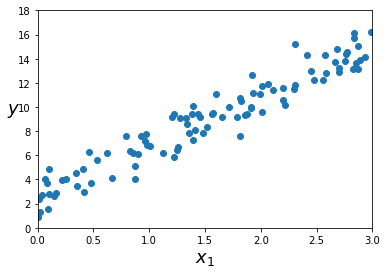

In [4]:
plt.plot(x, y, 'o')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.axis([0, 3, 0, 18])
plt.show()

In [5]:
X = np.c_[np.ones(x.shape[0]), x]
print('shape of X with bias: {}'.format(X.shape))
print(np.dot(X.T, X).shape)

w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print(w.shape)
print('found optimal parameters w0 = {:.2f} and w1 = {:.2f}'.format(w[0, 0], w[1, 0]))

shape of X with bias: (100, 2)
(2, 2)
(2, 1)
found optimal parameters w0 = 2.61 and w1 = 4.15


Make a prediction using our solution and superimpose it to the data points.

In [6]:
x_plot = np.array([0, 3])
x_plot = np.c_[np.ones(x_plot.shape[0]), x_plot]
y_pred = np.dot(x_plot, w)

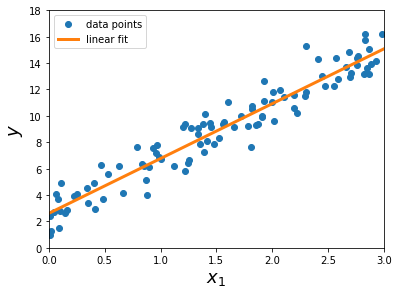

In [7]:
plt.plot(x, y, 'o', label='data points')
plt.plot([0, 3], y_pred, '-', lw=3, label='linear fit')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([0, 3, 0, 18])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.savefig('linear_regression.pdf')
plt.show()

Linear regression works seamlessly in any dimension, let's try an example in 3D. This is useful to find the equation of a plane the best fit a set of data points.

In [8]:
# example in 3D
np.random.seed(12)
x1 = 2 * np.random.rand(100, 1)
x2 = 3 * np.random.rand(100, 1)
yy = 1 + 2 * x1 + np.random.randn(100, 1) + 3 * x2 + np.random.randn(100, 1)

X = np.c_[np.ones(x.shape[0]), x1, x2]
w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(yy)
print(w.shape)
print('found optimal parameters w0 = {:.2f}, w1 = {:.2f} and w2 = {:.2f}'.format(*w[:, 0]))

(3, 1)
found optimal parameters w0 = 1.01, w1 = 1.84 and w2 = 3.00


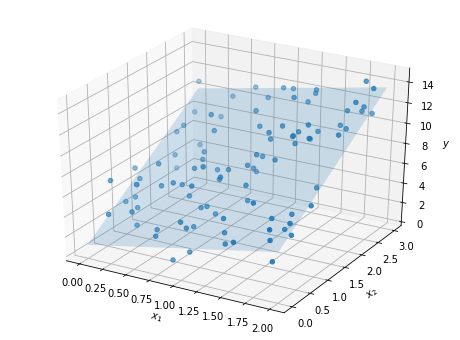

In [9]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# plot the plane surface
xx1, xx2 = np.meshgrid(range(3), range(4))
yyy = w[0, 0] + w[1, 0] * xx1 + w[2, 0] * xx2
ax.plot_surface(xx1, xx2, yyy, alpha=0.2)

# plot our data points
ax.scatter(x1, x2, yy)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')
plt.savefig('linear_regression_3D.pdf')
plt.show()

## Linear regression using batch gradient descent

In [10]:
eta = 0.1
n_epochs = 100
np.random.seed(12)
w = np.random.randn(2, 1)
X = np.c_[np.ones(x.shape[0]), x]
print('shape of X with bias: {}'.format(X.shape))
print(2/n * X.T.dot(X.dot(w) - y))  # first gradient, size 1+d

#dW = np.zeros_like(w)
#dW1 = 2*X[1]*(X[1].dot(w) - y[1])
#dW[:, 0] += dW1
for i in range(n):
    dW = np.zeros_like(w)
    dWi = 2 * X[i]*(X[i].dot(w) - y[i])
    dW[:, 0] += dWi
#dW /= n
print(dW)


shape of X with bias: (100, 2)
[[-19.05508287]
 [-36.99438375]]
[[-23.93431423]
 [-46.1639894 ]]


Now re-run the optimization to plot the evolution of the prediction. Play with the learning rate $\eta$ to see the effect of this hyperparameter.

[[ 0.47298583]
 [-0.68142588]]


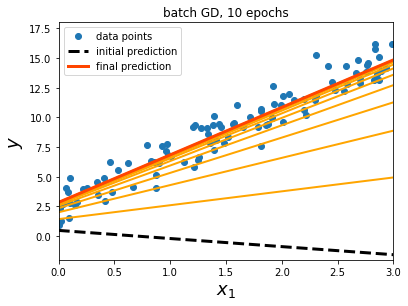

In [11]:
np.random.seed(12)
w = np.random.randn(2, 1)
print(w)
eta = 0.05
n_epochs = 10

plt.figure()
plt.plot(x, y, 'o', label='data points')
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, 'k--', lw=3, label='initial prediction')

for epoch in range(n_epochs):
    grad = 2/n * X.T.dot(X.dot(w) - y)
    w = w - eta * grad
    y_pred = np.dot(x_plot, w)
    plt.plot([0, 3], y_pred, '-', color='orange', lw=2)
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, '-', color='orangered', lw=3, label='final prediction')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([0, 3, -2, 18])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.title('batch GD, {} epochs'.format(n_epochs))
plt.savefig('linear_regression_batch_GD.pdf')
plt.show()

In [12]:
# one more time with stochastic gradient descent. Observe that with only 1 epoch the results are very good.

[[ 0.47298583]
 [-0.68142588]]


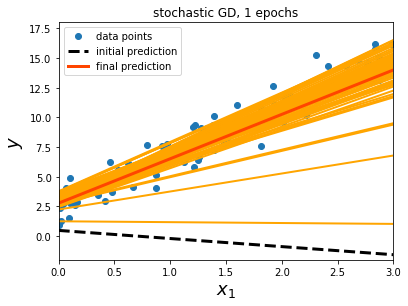

In [13]:
np.random.seed(12)
w = np.random.randn(2, 1)
print(w)
eta = 0.05
n_epochs = 1

plt.figure()
plt.plot(x, y, 'o', label='data points')
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, 'k--', lw=3, label='initial prediction')

for epoch in range(n_epochs):
    for i in range(n):
        index = np.random.randint(n)
        Xi = np.atleast_2d(X[index])
        grad = 2 * Xi.T.dot(Xi.dot(w) - y[index])
        w = w - eta * grad
        y_pred = np.dot(x_plot, w)
        plt.plot([0, 3], y_pred, '-', color='orange', lw=2)
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, '-', color='orangered', lw=3, label='final prediction')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([0, 3, -2, 18])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.title('stochastic GD, {} epochs'.format(n_epochs))
plt.savefig('linear_regression_stochastic_GD.pdf')
plt.show()

## Polynomial regression

Polynomial regression is actually equivalent to linear regression except that we do not perform the regression in the same space. Power need to be added to each feature:

$$y^i=w_0+w_1 x^i_1+w_2 (x^i_2)^2+\ldots w_d (x^i_d)^d$$

In [14]:
np.random.seed(42)

n = 100
X = 6 * np.random.rand(n, 1) - 3
y = -0.2*X**3 + 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

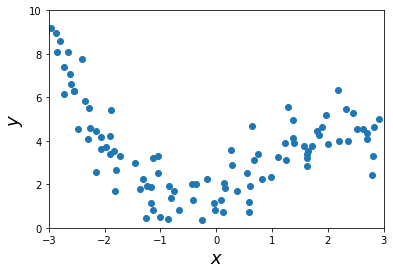

In [15]:
plt.plot(X, y, 'o')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [17]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78437842]), array([[ 1.02570217,  0.56304305, -0.21702965]]))

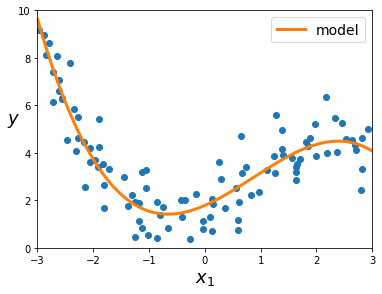

In [19]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'o')
plt.plot(X_new, y_new, '-', linewidth=3, label='model')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.subplots_adjust(top=0.95)
plt.savefig('polynomial_regression.pdf')
plt.show()

Now let's play with the degree of polynomial regression $d$. Observe how too low $d$ and too high $d$ lead respectively to underfitting and overfitting.

In [2]:
import numpy as np
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, 'o')

lin_reg = LinearRegression()
for d in [3, 1, 30]:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg.fit(X_poly, y)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X_new, y_new, '-', linewidth=3, label='order %d' % d)

plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.legend(loc='upper center', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.subplots_adjust(top=0.95)
plt.savefig('polynomial_regression_varying_degree.pdf')
plt.show()


NameError: name 'plt' is not defined

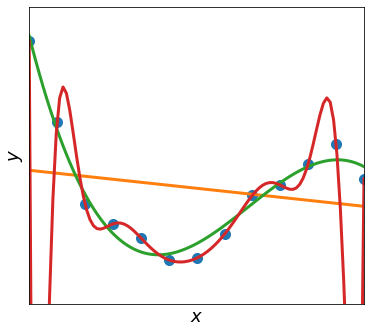

In [21]:
# eductional plot
n = 13
X = 6 * np.random.rand(n, 1) - 3
X = np.linspace(-3, 3, n, endpoint=True)
X = X.reshape((n, 1))
y = -0.2*X**3 + 0.5 * X**2 + X + 2 + 0.5 * np.random.randn(n, 1)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
plt.figure(figsize=(6, 5))
plt.plot(X, y, 'o', markersize=10)

lin_reg = LinearRegression()
for d in [1, 3, 15]:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg.fit(X_poly, y)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X_new, y_new, '-', linewidth=3, label='order %d' % d)

plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(top=0.95)
plt.savefig('under_and_overfitting.pdf')
plt.show()


## Regularized models

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

np.random.seed(42)
n = 27
X = 6 * np.random.rand(n, 1) - 3
X = np.linspace(-3, 3, n, endpoint=True)
X = X.reshape((n, 1))
y = -0.2*X**3 + 0.5 * X**2 + X + 2 + 1.0 * np.random.randn(n, 1)
X_new = np.linspace(-3, 3, 101, endpoint=True).reshape(101, 1)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
scaler.mean_
X_scaled = scaler.transform(X_poly)
print(X_scaled.shape)
model = Ridge(alpha=1.0)
print(y.shape)
model.fit(X_scaled, y)

# now predict
X_new_poly = poly_features.transform(X_new)

(27, 3)
(27, 1)


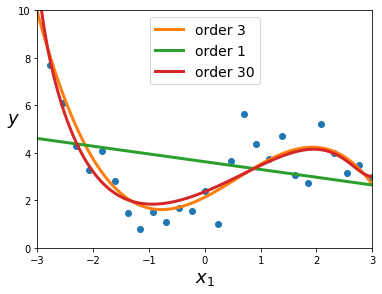

In [26]:
# using the closed form solution
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

plt.plot(X, y, 'o')

ridge_reg = Ridge(alpha=0.5, solver="cholesky", random_state=42)
for d in [3, 1, 30]:
    model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("regul_reg", ridge_reg),
        ])
    model.fit(X, y)
    y_pred = model.predict(X_new)
    plt.plot(X_new, y_pred, '-', linewidth=3, label='order %d' % d)

plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.legend(loc='upper center', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.subplots_adjust(top=0.95)
plt.savefig('polynomial_regression_regularized.pdf')
plt.show()

## Logistic regression

Here we have a look at logistic regression, which is in fact a binary classification model. It is illustrated using the popular iris data set.

Start by plotting the logistic function, observe that it is continuously derivable and bounded between 0 and 1.

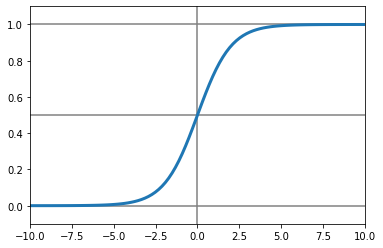

In [27]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
plt.figure()#figsize=(9, 3))
plt.axhline(y=0., color='gray')
plt.axhline(y=0.5, color='gray')
plt.axhline(y=1., color='gray')
plt.axvline(x=0., color='gray')
plt.plot(x, sigmoid, '-', linewidth=3)
plt.axis([-10, 10, -0.1, 1.1])
plt.savefig('logistic_function.pdf')
plt.show()


load the iris dataset

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [30]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)


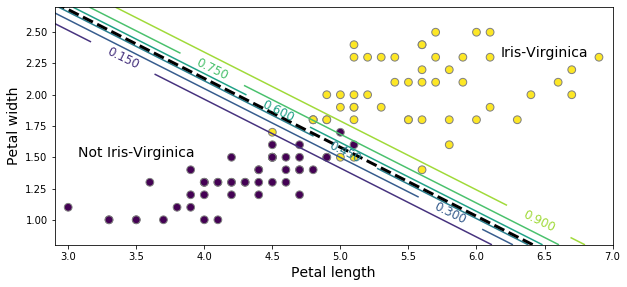

In [33]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='gray')
# plot contours and decision boundary
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

contour = plt.contour(x0, x1, zz)#, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)

plt.text(3.5, 1.5, 'Not Iris-Virginica', fontsize=14, ha='center')
plt.text(6.5, 2.3, 'Iris-Virginica', fontsize=14, ha='center')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.subplots_adjust(top=0.95)
plt.savefig('logistic_regression_iris.pdf')
plt.show()

## Softmax regression

To extend the logistic regression to multiple class (multinomial logistic regression), we now study Softmax regression. Here $k$ represent a class index with $K$ classes, $0\leq k < K$.

In [34]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
labels = ['Iris-Virginica', 'Iris-Versicolor', 'Iris-Setosa']
print(np.unique(y))

[0 1 2]


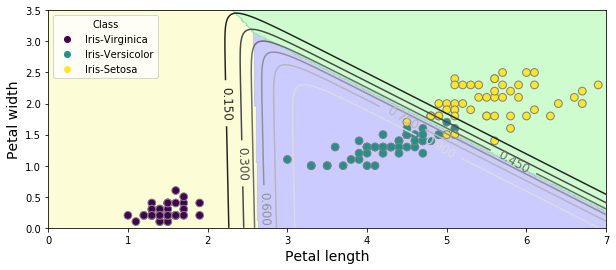

In [36]:
plt.figure(figsize=(10, 4))
plt.contourf(x0, x1, zz, alpha=0.5, cmap=custom_cmap)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='gray', label=labels)
contour = plt.contour(x0, x1, zz1, cmap='gray')
plt.clabel(contour, inline=1, fontsize=12)
plt.legend(handles=scatter.legend_elements()[0], labels=labels, title='Class')

plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
#plt.legend(loc='center left', fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig('softmax_regression_iris.pdf')
plt.show()